todo:

- correlations
- Cross validations 
- Redandency

## Data Understanding

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statistics
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
set1_df = pd.read_csv('set9_it1.csv')
set2_df = pd.read_csv('set9_it2.csv')
set3_df = pd.read_csv('set9_it3.csv')

In [7]:
print(set1_df.isna().sum())
print(set2_df.isna().sum())
print(set3_df.isna().sum())


DI                  0
TradeValue          0
RealmType           0
Enclave             0
LivingQuarters    117
ParcelSize          0
ParcelSizeUnit      0
dtype: int64
DI                     0
StructuralIntegrity    0
ExteriorCharm          0
dtype: int64
DI                0
Craftsmanship     0
EraConstructed    0
dtype: int64


### Checking new data before cleaning

In [5]:
## if anyone has any idea what to check do it here 

## Data Preperation

In [9]:
# deleteing the rows with missing values 
set1_df.dropna(inplace=True)
# removes the duplicate rows in place
set1_df.drop_duplicates(inplace=True)
set2_df.drop_duplicates(inplace=True)
set3_df.drop_duplicates(inplace=True)

# Removing parcelSize below one
set1_df.drop(set1_df[set1_df['ParcelSize'] < 1].index, inplace=True)

# Cleaning capitalisation 
set1_df['Enclave'] = set1_df['Enclave'].str.capitalize()

# Replacing typos after manual inspection
set1_df['Enclave'] = set1_df['Enclave'].replace('Sunspires', 'Sunspire')
set1_df['Enclave'] = set1_df['Enclave'].replace('Dragonspires', 'dragonspire')

# Converting incosintent metrics
SQFT_TO_SQM = 0.092903

set1_df.loc[set1_df["ParcelSizeUnit"] == "sqft", "ParcelSize"] *= SQFT_TO_SQM
set1_df.loc[set1_df["ParcelSizeUnit"] == "sqft", "ParcelSizeUnit"] = "sqm"


In [11]:
df = set1_df.merge(set2_df, left_on='DI', right_on='DI')
df = df.merge(set3_df, left_on='DI', right_on='DI')

In [13]:

# Transforming ExteriorCharm to a Ordinal level of messeruments 
sortedCharms = list(df.groupby('ExteriorCharm')['TradeValue'].mean().sort_values().index)

df['ExteriorCharm'] = df['ExteriorCharm'].map(lambda x: sortedCharms.index(x))
df['RealmType'].unique()

array(['Meadowlands', 'GnomeBurough', 'ArcaneMarket', 'AetherIsles',
       'CitadelQuarter'], dtype=object)

I would love to translate this into some kind of coefficent

Linear Regression

In [85]:
from sklearn import datasets, linear_model

linear_model = LinearRegression()

X = df[['TradeValue']]
y = df[['Craftsmanship', 'ExteriorCharm', 'EraConstructed']]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=0)

linear_model.fit(X_train, y_train)

y_preds = linear_model.predict(X_valid)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_valid, y_preds))

Mean squared error: 11284.69


In [106]:
from sklearn.model_selection import cross_val_score

scores = -1 * cross_val_score(linear_model, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

scores = -1 * cross_val_score(linear_model, X, y,
                              cv=5,
                              scoring='neg_mean_squared_error')

print("Average MSE score:", scores.mean())

Average MAE score: 51.25338283376184
Average MSE score: 12100.218827389786


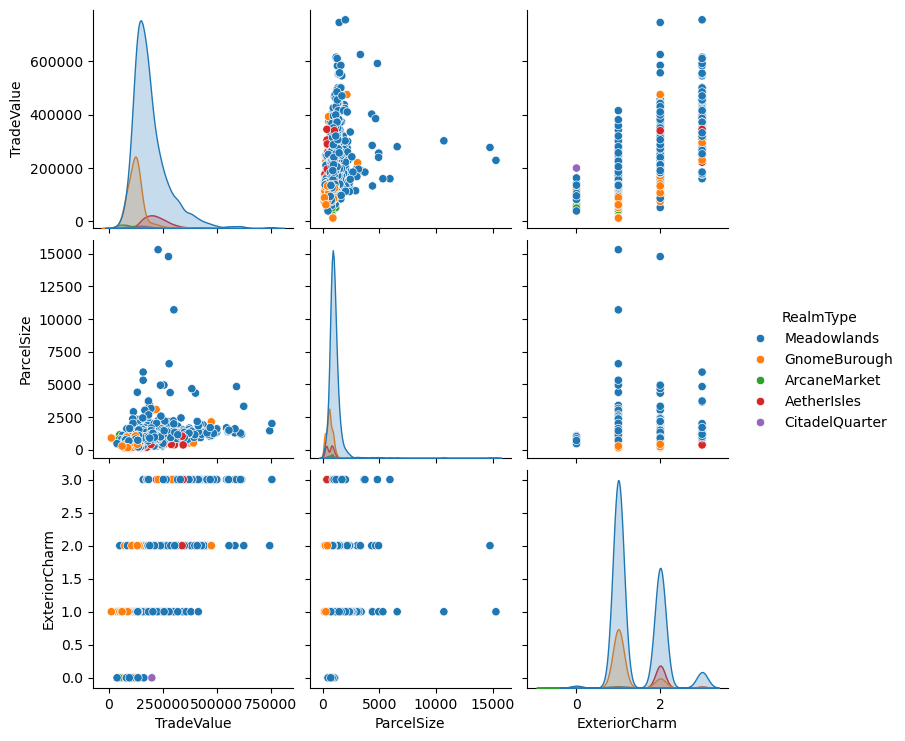

In [15]:
sns.pairplot(df[['TradeValue','RealmType','ParcelSize','ExteriorCharm']],hue='RealmType')

#### Try both alrogithms 

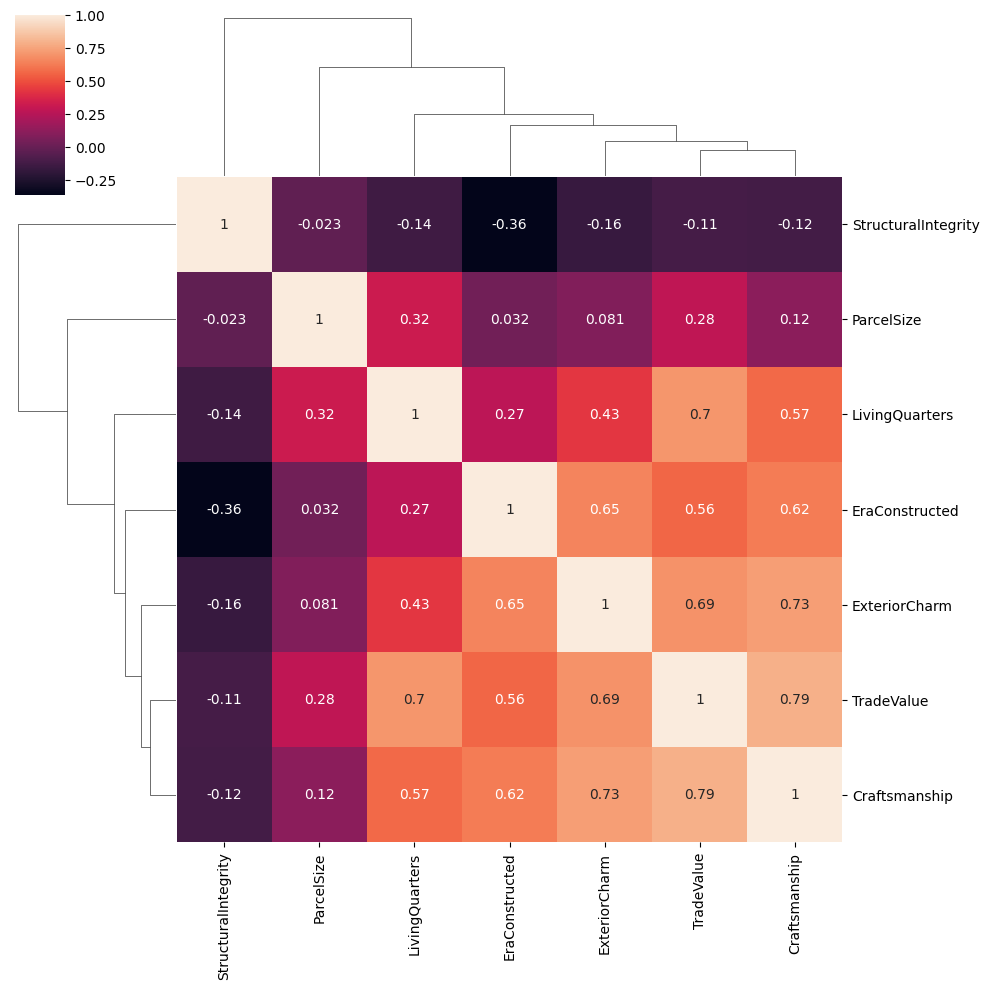

In [39]:
sns.clustermap(
	df.filter(items=[col for col in df.columns if col not in ['RealmType','Enclave','ParcelSizeUnit','DI']]).corr(),
	annot=True
	)
	